## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


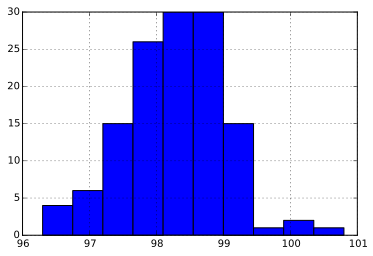

In [4]:
df['temperature'].hist()

No, this sample isn't normal, it is definitely skewed. However "this is a condition for the CLT... to apply" is just wrong. The whole power of the CLT is that it says that the distribution of sample means (not the sample distribution) tends to a normal distribution *regardless* of the distribution of the population or sample.

In [17]:
m=df['temperature'].mean()
m

98.249230769230749

With 130 data points, it really doesn't matter if we use the normal or t distribution. A t distribution with 129 degrees of freedom is essentially a normal distribution, so the results should not be very different. However, in this day in age I don't see the purpose of even bothering with the normal distribution. Looking up t distribution tables is awfully annoying, so it once had purpose, however nowdays I'm just going to let a computer calculate either for me, and both are equally simple.

In [18]:
from scipy.stats import t, norm
from math import sqrt

In [39]:
patients=df.shape[0]
n=patients-1

In [38]:
patients


130

In [40]:
SE=df['temperature'].std()/sqrt(n)
SE

0.064553177600021841

Our null hypothosis is that the true average body temperature is $98.6^\circ F$. We'll be calculating the probability of finding a value less than or equal to the mean we obtained in this data given that this null hypothosis is true, i.e. our alternative hypothosis is that the true average body temperature is less than $98.6^\circ F$

In [20]:
t.cdf((m-98.6)/SE,n)

1.3267323730222045e-07

In [19]:
norm.cdf((m-98.6)/SE)

2.758278803501184e-08

Regardless of what distribution we assume we are drawing sample means from, the probability of seeing this data or averages less than it if the true average body temperature was 98.6 is basically zero.

In [21]:
print(m+t.ppf(0.95,n)*SE)
print(m-t.ppf(0.95,n)*SE)

98.3561793491
98.1422821893


In [22]:
t.ppf(0.95,n)*SE

0.10694857988506747

Our estimate of the true average human body temperature is thus $98.2^\circ F \pm 0.1$.

This confidence interval, however, does *not* answer the question 'At what temperature should we consider someone's temperature to be "abnormal"?'. We can look at the population distribution, and see right away that the majority of our test subjects would be considered abnormal if we this, which makes no sense.

The confidence intervals only say something about what we can expect of sample means, not about individual values. Unfortunately, we would not expect the percentiles of this data to be drawn from a normal distribution, so I, at least, am not currently equipped to do confidence/hypothosis testing. However, I can give them, which should give a good estimate of what should be considered normal, but I can't give estimates of how confident we can be in these values.

In [50]:
df['temperature'].quantile([.1,.9])

0.1    97.29
0.9    99.10
dtype: float64

This range, 97.29-99.10 degrees F includes 80% of the patients in our sample.

This shows the dramatic difference between the population distribution and the sample distribution of the mean; we looked at the sample distribution (from the confidence interval), and found that 90% of the population fell within a $\pm 0.1^\circ$ range, while looking at the population distribution, we see a $\pm 0.9^\circ$ range for a smaller percentage of the distribution.

In [32]:
males=df[df['gender']=='M']
males.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [31]:
females=df[df['gender']=='F']
females.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [62]:
SEgender=sqrt(females['temperature'].std()/females.shape[0]+males['temperature'].std()/males.shape[0])
SEgender

0.14895758379539512

In [61]:
mgender=females['temperature'].mean()-males['temperature'].mean()
mgender

0.28923076923076962

In [63]:

2*(1-t.cdf(mgender/SEgender,21))

0.065709541743767419

The probability of seeing this difference in our data if our null hypothosis (that there is no gender difference) is true is actually relatively high, 6.5%. Using the 5% threshold, we can't reject the null hypothosis.